| **Inicio** | **atrás 1** | **Siguiente 3** |
|----------- |-------------- |---------------|
| [🏠](../../../README.md) | [⏪](./1.ALGORITMOS_DE_REGRESION.ipynb)| [⏩](./3.ALGORITMOS_DE_CLUSTERING.ipynb)|

# **2. ALGORITMOS DE CLASIFICACIÓN**

## **Métricas para evaluar modelos de Clasificación**

Existen diversas métricas que se utilizan para evaluar modelos de clasificación. A continuación, te proporcionaré una explicación detallada de algunas de las métricas más comunes, junto con ejemplos de código en Python y gráficas para ilustrar su uso.

1. ***Matriz de confusión:**

La matriz de confusión es una tabla que muestra la cantidad de clasificaciones correctas e incorrectas realizadas por un modelo de clasificación. Permite visualizar el rendimiento del modelo en términos de verdaderos positivos (`TP`), falsos positivos (`FP`), verdaderos negativos (`TN`) y falsos negativos (`FN`). A partir de esta matriz, se pueden calcular otras métricas.

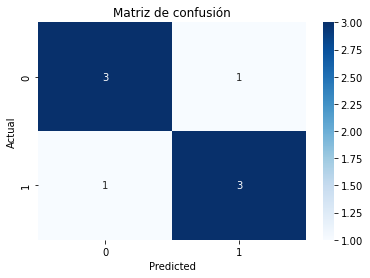

In [2]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Datos de ejemplo
y_true = [1, 0, 0, 1, 1, 0, 1, 0]
y_pred = [1, 1, 0, 1, 0, 0, 1, 0]

# Calcular matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Visualizar matriz de confusión
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de confusión')
plt.show()

La matriz de confusión muestra el número de muestras clasificadas correctamente e incorrectamente para cada clase. En el ejemplo, se muestra una matriz de confusión binaria, donde la clase positiva es representada por 1 y la clase negativa por 0.

2. **Precisión (Accuracy):**

La precisión es una métrica que mide la proporción de muestras clasificadas correctamente sobre el total de muestras.

In [3]:
from sklearn.metrics import accuracy_score

# Calcular precisión
accuracy = accuracy_score(y_true, y_pred)
print("Precisión:", accuracy)

Precisión: 0.75


3. **Precisión por clase:**

La precisión por clase proporciona la precisión para cada clase por separado. Es útil cuando las clases están desequilibradas.

In [4]:
from sklearn.metrics import precision_score

# Calcular precisión por clase
precision = precision_score(y_true, y_pred, average=None)
print("Precisión por clase:", precision)

Precisión por clase: [0.75 0.75]


4. **Recall (Sensibilidad o Tasa de verdaderos positivos):**

El recall mide la proporción de verdaderos positivos clasificados correctamente sobre el total de verdaderos positivos.


In [5]:
from sklearn.metrics import recall_score

# Calcular recall
recall = recall_score(y_true, y_pred)
print("Recall:", recall)

Recall: 0.75


5. **F1-Score:**

El F1-Score es la media armónica de la precisión y el recall. Es una métrica útil cuando hay un desequilibrio entre las clases.

In [6]:
from sklearn.metrics import f1_score

# Calcular F1-Score
f1 = f1_score(y_true, y_pred)
print("F1-Score:", f1)

F1-Score: 0.75


Estas son solo algunas de las métricas más comunes utilizadas para evaluar modelos de clasificación. La elección de las métricas depende del problema en cuestión y del equilibrio deseado entre la precisión y el recall. Es importante tener en cuenta que cada métrica tiene sus ventajas y limitaciones, y es recomendable utilizar varias métricas para obtener una evaluación más completa del modelo de clasificación.

## **Regresión Logística**

La Regresión Logística es un algoritmo de aprendizaje supervisado utilizado para resolver problemas de clasificación binaria, es decir, cuando queremos predecir la pertenencia a una de dos clases posibles. A pesar de su nombre, la Regresión Logística se utiliza para clasificar y no para realizar regresión.

La Regresión Logística utiliza una función logística, también conocida como sigmoide, para modelar la relación entre las variables independientes y la probabilidad de pertenecer a una clase específica. La función logística tiene la siguiente forma:

$f(x) = 1 / (1 + e^(-x))$

En esta función, $x$ es una combinación lineal de las variables independientes ponderadas por los coeficientes del modelo. El objetivo de la Regresión Logística es encontrar los mejores coeficientes que maximicen la verosimilitud de los datos observados.

A continuación, se muestra un ejemplo de cómo implementar la Regresión Logística en Python utilizando la biblioteca Scikit-learn:

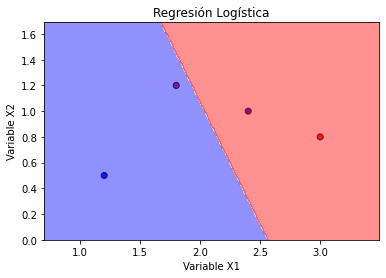

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Datos de ejemplo
X = np.array([[1.2, 0.5], [2.4, 1.0], [1.8, 1.2], [3.0, 0.8]])
y = np.array([0, 0, 1, 1])

# Crear el modelo de Regresión Logística
logreg = LogisticRegression()

# Entrenar el modelo
logreg.fit(X, y)

# Realizar predicciones
y_pred = logreg.predict(X)

# Graficar los datos y las predicciones
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.xlabel('Variable X1')
plt.ylabel('Variable X2')

# Crear una malla para graficar las regiones de decisión
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.5, cmap='bwr')

plt.title('Regresión Logística')
plt.show()

En este ejemplo, se tienen dos variables independientes (`X1` y `X2`) y una variable dependiente binaria (0 o 1). Se crea un modelo de Regresión Logística utilizando la clase `LogisticRegression` de Scikit-learn. El modelo se entrena con los datos de entrada `X` y las etiquetas `y`. Luego, se utilizan las variables `X` para realizar predicciones y se grafican los datos junto con las regiones de decisión generadas por el modelo.

La gráfica muestra los puntos de datos en función de las variables `X1` y `X2`, y las regiones de decisión se muestran en colores diferentes para las dos clases. La Regresión Logística busca encontrar una línea que separe las dos clases de manera óptima en función de las probabilidades estimadas.

Es importante tener en cuenta que este es un ejemplo simplificado y la Regresión Logística puede manejar conjuntos de datos más complejos con múltiples variables independientes. Además, se pueden aplicar técnicas como regularización y validación cruzada para mejorar el rendimiento del modelo.

![Regresión Logística](../img/Regresi%C3%B3n%20Log%C3%ADstica.png "Regresión Logística")

## **Clasificación con KNN**

La clasificación con KNN (K-Nearest Neighbors) es un algoritmo de aprendizaje supervisado utilizado para la clasificación de datos. El objetivo es asignar una etiqueta de clase a un nuevo punto de datos basado en las etiquetas de clase de los puntos de datos vecinos más cercanos en el conjunto de entrenamiento. El algoritmo se basa en la suposición de que los puntos de datos similares tienden a tener etiquetas de clase similares.

A continuación, se presenta una explicación detallada del algoritmo KNN junto con un ejemplo en código Python y gráficas.

* **Paso 1:** Importar las bibliotecas necesarias y generar los datos de ejemplo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generar datos de ejemplo
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

* **Paso 2:** Crear y entrenar el modelo KNN.

In [2]:
# Crear el clasificador KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

* **Paso 3:** Realizar predicciones y evaluar el rendimiento del modelo.

In [3]:
# Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 1.0


* **Paso 4:** Visualizar los datos y las regiones de clasificación.

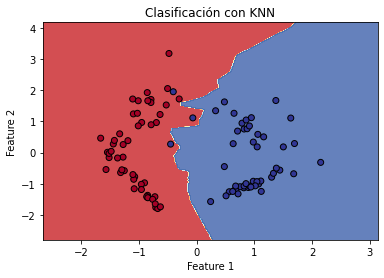

In [4]:
# Crear una malla de puntos para visualizar las regiones de clasificación
h = 0.02  # Paso de la malla
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Realizar predicciones en la malla de puntos
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar los datos y las regiones de clasificación
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clasificación con KNN')
plt.show()

En el ejemplo anterior, se importan las bibliotecas necesarias y se generan datos de ejemplo utilizando la función `make_classification` de scikit-learn. Luego, se dividen los datos en conjuntos de entrenamiento y prueba utilizando `train_test_split`.

Se crea un objeto de clasificador KNN con `KNeighborsClassifier` y se entrena el modelo utilizando el conjunto de entrenamiento.

Después de entrenar el modelo, se realizan predicciones en el conjunto de prueba y se calcula la precisión del modelo utilizando `accuracy_score`.

Finalmente, se crea una malla de puntos para visualizar las regiones de clasificación y se grafican los datos de entrenamiento junto con las regiones de clasificación resultantes.

Este es un ejemplo básico de clasificación con KNN en Python. El algoritmo KNN es flexible y puede ajustarse mediante la selección adecuada del número de vecinos (`n_neighbors`) y otras configuraciones.

## **Clasificación con Vectores de Soporte**

La clasificación con Vectores de Soporte (SVM, por sus siglas en inglés: Support Vector Machines) es un algoritmo de aprendizaje supervisado utilizado para la clasificación de datos. El objetivo es encontrar un hiperplano en un espacio de alta dimensión que pueda separar claramente las diferentes clases de datos. Los vectores de soporte son los puntos de datos más cercanos al hiperplano y desempeñan un papel crucial en la definición del mismo.

A continuación, se presenta una explicación detallada del algoritmo SVM junto con un ejemplo en código Python y gráficas.

* **Paso 1:** Importar las bibliotecas necesarias y generar los datos de ejemplo.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generar datos de ejemplo
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

* **Paso 2:** Crear y entrenar el modelo SVM.

In [6]:
# Crear el clasificador SVM
svm = SVC(kernel='linear')

# Entrenar el modelo
svm.fit(X_train, y_train)

SVC(kernel='linear')

* **Paso 3:** Realizar predicciones y evaluar el rendimiento del modelo.

In [7]:
# Realizar predicciones en el conjunto de prueba
y_pred = svm.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 1.0


* **Paso 4:** Visualizar los datos y el hiperplano de separación.

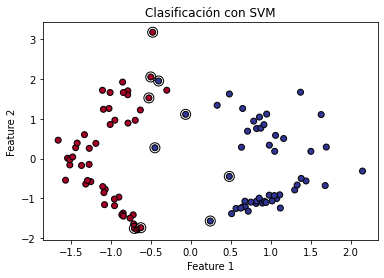

In [8]:
# Obtener los vectores de soporte
support_vectors = svm.support_vectors_

# Graficar los datos y los vectores de soporte
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], facecolors='none', edgecolors='k', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clasificación con SVM')
plt.show()

En el ejemplo anterior, se importan las bibliotecas necesarias y se generan datos de ejemplo utilizando la función `make_classification` de scikit-learn. Luego, se dividen los datos en conjuntos de entrenamiento y prueba utilizando `train_test_split`.

Se crea un objeto de clasificador SVM con SVC y se entrena el modelo utilizando el conjunto de entrenamiento. Es importante seleccionar el kernel adecuado según las características de los datos. En este ejemplo, se utiliza el kernel lineal.

Después de entrenar el modelo, se realizan predicciones en el conjunto de prueba y se calcula la precisión del modelo utilizando `accuracy_score`.

Finalmente, se visualizan los datos de entrenamiento y se muestran los vectores de soporte, que son los puntos de datos más cercanos al hiperplano de separación.

Este es un ejemplo básico de clasificación con SVM en Python. El algoritmo SVM es poderoso y puede ser utilizado para problemas de clasificación binaria y multiclase, y se puede ajustar mediante la selección del kernel y la configuración de los parámetros apropiados.

![Clasificación con Vectores de Soporte](../img/Clasificaci%C3%B3n%20con%20Vectores%20de%20Soporte.png "Clasificación con Vectores de Soporte")

## **Clasificación con Árboles de Decisión**

La clasificación con árboles de decisión es un algoritmo de aprendizaje supervisado utilizado para la clasificación de datos. Se basa en la construcción de un árbol que toma decisiones basadas en características específicas de los datos. Cada nodo interno del árbol representa una característica, cada rama representa una regla de decisión y cada hoja representa una clase o etiqueta.

A continuación, se presenta una explicación detallada del algoritmo de clasificación con árboles de decisión junto con un ejemplo en código Python y gráficas.

* **Paso 1:** Importar las bibliotecas necesarias y generar los datos de ejemplo.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Generar datos de ejemplo
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

* **Paso 2:** Crear y entrenar el modelo de árbol de decisión.

In [10]:
# Crear el clasificador de árbol de decisión
tree = DecisionTreeClassifier()

# Entrenar el modelo
tree.fit(X_train, y_train)

DecisionTreeClassifier()

* **Paso 3:** Realizar predicciones y evaluar el rendimiento del modelo.

In [11]:
# Realizar predicciones en el conjunto de prueba
y_pred = tree.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.95


* **Paso 4:** Visualizar el árbol de decisión.

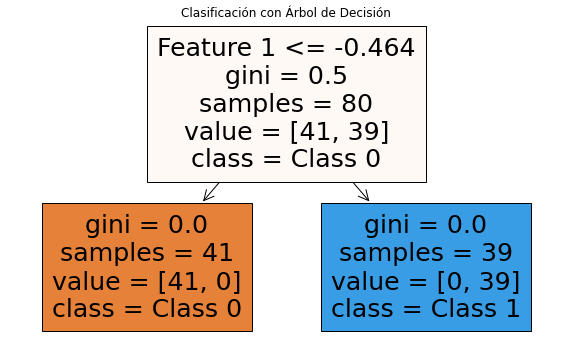

In [12]:
# Importar la biblioteca para visualizar árboles de decisión
from sklearn.tree import plot_tree

# Visualizar el árbol de decisión
plt.figure(figsize=(10, 6))
plot_tree(tree, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'], filled=True)
plt.title('Clasificación con Árbol de Decisión')
plt.show()

En el ejemplo anterior, se importan las bibliotecas necesarias y se generan datos de ejemplo utilizando la función `make_classification` de scikit-learn. Luego, se dividen los datos en conjuntos de entrenamiento y prueba utilizando `train_test_split`.

Se crea un objeto de clasificador de árbol de decisión con `DecisionTreeClassifier` y se entrena el modelo utilizando el conjunto de entrenamiento.

Después de entrenar el modelo, se realizan predicciones en el conjunto de prueba y se calcula la precisión del modelo utilizando `accuracy_score`.

Finalmente, se visualiza el árbol de decisión utilizando la función `plot_tree` de scikit-learn, que muestra las características utilizadas en las divisiones y las etiquetas de clase en cada nodo.

Este es un ejemplo básico de clasificación con árboles de decisión en Python. Los árboles de decisión son algoritmos intuitivos y pueden manejar tanto características numéricas como categóricas. Además, permiten interpretar el modelo y comprender las reglas de decisión utilizadas para la clasificación.

## **Función GINI y Entropía**

La función Gini y la entropía son dos medidas utilizadas en algoritmos de aprendizaje automático para evaluar la impureza de un conjunto de datos en el contexto de los árboles de decisión. Ambas medidas se utilizan para tomar decisiones sobre cómo dividir los datos en los nodos del árbol con el objetivo de maximizar la pureza y la calidad de la clasificación. A continuación, se explica cada una de estas medidas en detalle junto con ejemplos en código Python y gráficas.

* **Función Gini:**

La función Gini mide la impureza de un conjunto de datos dividiéndolo en clases. Se calcula la probabilidad de que un elemento seleccionado aleatoriamente del conjunto de datos esté etiquetado incorrectamente si se etiqueta aleatoriamente según la distribución de etiquetas en el subconjunto. La fórmula de la función Gini es la siguiente:

$Gini = 1 - Σ (p_i)^2$

**Donde:**

* $p_i$ es la proporción de la clase $i$ en el subconjunto.

* **Entropía:**

La entropía mide la impureza o incertidumbre de un conjunto de datos. Se calcula la suma de la probabilidad de cada clase multiplicada por el logaritmo de esa probabilidad. Cuanto mayor sea la entropía, mayor será la impureza y la incertidumbre en el conjunto de datos. La fórmula de la entropía es la siguiente:

$Entropía = - Σ (p_i * log2(p_i))$

**Donde:**

* $p_i$ es la proporción de la clase $i$ en el subconjunto.

A continuación, se presenta un ejemplo en código Python que muestra cómo calcular la función Gini y la entropía utilizando la biblioteca scikit-learn.

In [13]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Crear el clasificador de árbol de decisión
clf = DecisionTreeClassifier()

# Entrenar el modelo
clf.fit(X, y)

# Realizar predicciones
y_pred = clf.predict(X)

# Calcular la precisión del modelo
accuracy = accuracy_score(y, y_pred)
print("Precisión del modelo:", accuracy)

# Calcular la función Gini
gini = 1 - np.sum((np.bincount(y) / len(y))**2)
print("Función Gini:", gini)

# Calcular la entropía
probs = np.bincount(y) / len(y)
entropy = -np.sum(probs * np.log2(probs))
print("Entropía:", entropy)

Precisión del modelo: 1.0
Función Gini: 0.6666666666666667
Entropía: 1.584962500721156


En el ejemplo anterior, se utiliza el conjunto de datos `Iris` de scikit-learn. Se crea un clasificador de árbol de decisión y se entrena utilizando las características `X` y las etiquetas `y` del conjunto de datos.

Se realizan predicciones utilizando el conjunto de datos de entrenamiento y se calcula la precisión del modelo utilizando `accuracy_score`.

Luego, se calcula la función Gini utilizando la fórmula mencionada y se muestra el resultado. Además, se calcula la entropía utilizando la fórmula mencionada y se muestra el resultado.

Es importante tener en cuenta que estos cálculos se realizan en el contexto de los árboles de decisión para evaluar la calidad de las divisiones de nodos y la pureza de los subconjuntos resultantes.

## **Clasificación con Random Forest**

La clasificación con Random Forest es un algoritmo de aprendizaje automático que combina múltiples árboles de decisión para realizar predicciones más precisas. Random Forest es una técnica de ensamblaje que utiliza el concepto de "`bagging`" (ensacado) para crear una colección de árboles de decisión y combinar sus resultados.

A continuación, se proporciona una explicación detallada del algoritmo Random Forest junto con un ejemplo de código Python y gráficas.

* **Algoritmo Random Forest:**

El algoritmo Random Forest se basa en el concepto de ensacado (`bagging`) y utiliza una combinación de múltiples árboles de decisión para realizar la clasificación. El proceso general del algoritmo es el siguiente:

a. Seleccionar aleatoriamente una muestra del conjunto de datos de entrenamiento.

b. Construir un árbol de decisión utilizando la muestra seleccionada en el paso anterior.

c. Repetir los pasos `a` y `b` varias veces para construir múltiples árboles de decisión.

d. Realizar la clasificación combinando las predicciones de todos los árboles (por mayoría de votos en clasificación) para obtener el resultado final.

La idea principal detrás de Random Forest es que cada árbol en el conjunto tiene una ligera variación en la forma en que se construye, lo que lleva a una diversidad en las predicciones. Esta diversidad ayuda a reducir el sobreajuste y mejora la precisión general del modelo.

**Ejemplo:**

A continuación se muestra un ejemplo de código Python que utiliza la biblioteca scikit-learn para entrenar y utilizar un clasificador Random Forest en un conjunto de datos de clasificación.

Precisión del modelo: 1.0


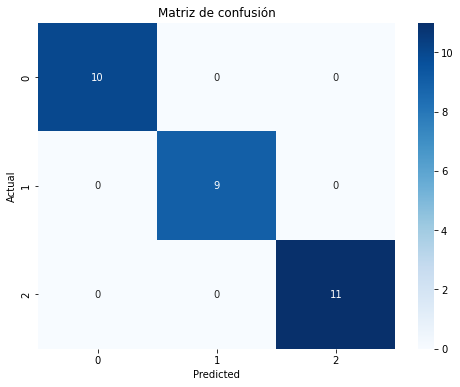

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el clasificador Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Crear una matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de confusión')
plt.show()

En el ejemplo anterior, se utiliza el conjunto de datos `Iris` de scikit-learn. El conjunto de datos se divide en conjuntos de entrenamiento y prueba utilizando `train_test_split`.

Se crea un clasificador Random Forest utilizando `RandomForestClassifier` de scikit-learn y se especifica el número de árboles mediante el parámetro `n_estimators`.

El modelo se entrena utilizando el conjunto de entrenamiento utilizando el método `fit`. Luego, se realizan predicciones en el conjunto de prueba utilizando el método `predict`.

Se calcula la precisión del modelo utilizando la función `accuracy_score` y se crea una matriz de confusión utilizando `confusion_matrix`. Finalmente, se visualiza la matriz de confusión utilizando heatmap de la biblioteca seaborn.

**Interpretación de las gráficas:**

La matriz de confusión es una representación visual de los resultados del modelo de clasificación. En el eje `x` se muestran las clases predichas por el modelo, mientras que en el eje `y` se muestran las clases reales. Los valores en las celdas de la matriz indican la cantidad de muestras clasificadas correctamente o incorrectamente.

La visualización de la matriz de confusión ayuda a evaluar la calidad del modelo de clasificación. Un modelo con una alta precisión tendrá una matriz de confusión con valores altos en la diagonal principal y valores bajos fuera de la diagonal.

Espero que esta explicación y el ejemplo de código te ayuden a comprender mejor el algoritmo Random Forest en la clasificación.

![Clasificación con Random Forest](../img/Clasificaci%C3%B3n%20con%20Random%20Forest.png "Clasificación con Random Forest")

## **Clasificación con XGBOOST**

La clasificación con XGBoost (Extreme Gradient Boosting) es un algoritmo de aprendizaje automático que se basa en el método de impulso de gradientes para realizar predicciones precisas en problemas de clasificación. XGBoost es conocido por su capacidad para manejar conjuntos de datos grandes, su eficiencia computacional y su capacidad para manejar una variedad de tipos de variables.

A continuación, se proporciona una explicación detallada del algoritmo XGBoost junto con un ejemplo de código Python y gráficas.

* **Algoritmo XGBoost:**

XGBoost es un algoritmo de impulso de gradientes que combina múltiples árboles de decisión débiles para formar un modelo fuerte. El proceso general del algoritmo es el siguiente:

a. Inicializar el modelo con un valor constante, generalmente la media de las etiquetas de clasificación.

b. Construir un árbol de decisión débil que se ajuste a los residuos (diferencia entre las etiquetas reales y las predicciones actuales del modelo).

c. Ajustar el modelo agregando el árbol de decisión débil al modelo existente con un factor de aprendizaje (learning rate) para reducir el impacto de cada árbol.

d. Repetir los pasos `b` y `c` hasta que se alcance el número deseado de árboles o hasta que se logre la precisión deseada.

e. Realizar la clasificación combinando las predicciones de todos los árboles mediante una función de suma ponderada.

La idea principal detrás de XGBoost es corregir los errores del modelo anterior mediante la construcción de árboles adicionales que se centren en los residuos. Esto permite mejorar la precisión del modelo en cada iteración.

**Ejemplo:**

A continuación se muestra un ejemplo de código Python que utiliza la biblioteca XGBoost para entrenar y utilizar un clasificador XGBoost en un conjunto de datos de clasificación.

Precisión del modelo: 1.0


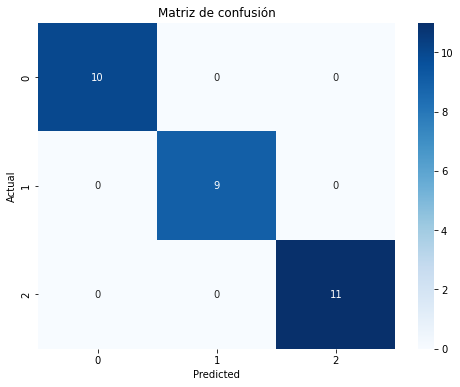

In [15]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el clasificador XGBoost
xgb_clf = xgb.XGBClassifier()

# Entrenar el modelo
xgb_clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = xgb_clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Crear una matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de confusión')
plt.show()

En el ejemplo anterior, se utiliza el conjunto de datos `Iris` de scikit-learn. El conjunto de datos se divide en un conjunto de entrenamiento y un conjunto de prueba utilizando la función `train_test_split`. Luego, se crea un clasificador XGBoost utilizando `xgb.XGBClassifier` y se entrena el modelo con el conjunto de entrenamiento utilizando el método `fit`. A continuación, se realizan predicciones en el conjunto de prueba utilizando el método `predict`.

Se calcula la precisión del modelo utilizando la función `accuracy_score` y se crea una matriz de confusión utilizando `confusion_matrix`. Finalmente, se visualiza la matriz de confusión utilizando `heatmap` de la biblioteca seaborn.

* **Interpretación de las gráficas:**

La matriz de confusión es una representación visual de los resultados del modelo de clasificación. En el eje `x` se muestran las clases predichas por el modelo, mientras que en el eje `y` se muestran las clases reales. Los valores en las celdas de la matriz indican la cantidad de muestras clasificadas correctamente o incorrectamente.

La visualización de la matriz de confusión ayuda a evaluar la calidad del modelo de clasificación. Un modelo con una alta precisión tendrá una matriz de confusión con valores altos en la diagonal principal y valores bajos fuera de la diagonal.

Espero que esta explicación y el ejemplo de código te ayuden a comprender mejor el algoritmo XGBoost en la clasificación.

![Clasificación](../img/Clasificaci%C3%B3n.png "Clasificación")

| **Inicio** | **atrás 1** | **Siguiente 3** |
|----------- |-------------- |---------------|
| [🏠](../../../README.md) | [⏪](./1.ALGORITMOS_DE_REGRESION.ipynb)| [⏩](./3.ALGORITMOS_DE_CLUSTERING.ipynb)|